In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
delivery=pd.read_csv("C:\\Users\\Rahul\\Downloads\\delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

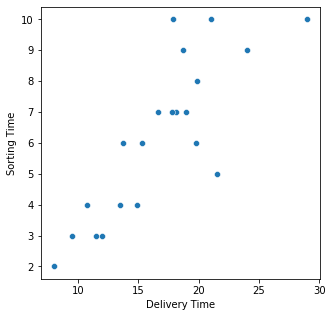

In [4]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Delivery Time',y='Sorting Time',data=delivery)

In [5]:
# Correlation
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

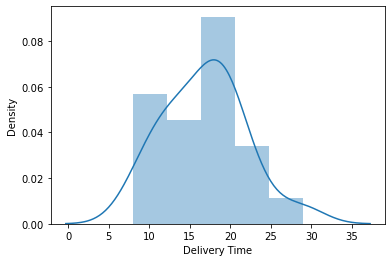

In [6]:
sns.distplot(delivery['Delivery Time'])

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

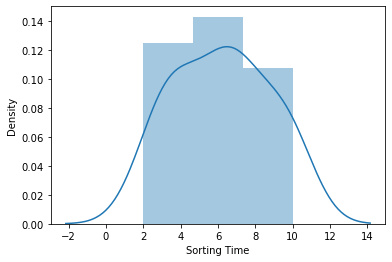

In [7]:
sns.distplot(delivery['Sorting Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

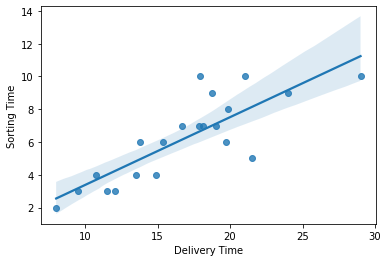

In [8]:
sns.regplot(x='Delivery Time',y='Sorting Time',data=delivery)

In [9]:
# Remaning columns
delivery=delivery.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
delivery

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
model=smf.ols('sorting_time~delivery_time',data=delivery).fit()

In [11]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [12]:
model.fittedvalues

0      7.931943
1      4.828866
2      7.414763
3      9.173174
4     11.241892
5      5.594291
6      7.104456
7      3.173891
8      6.649338
9      7.001020
10     7.447863
11     3.691071
12     6.144570
13     4.001378
14     4.220662
15     5.399832
16     4.932302
17     6.736224
18     2.553276
19     6.620376
20     8.138815
dtype: float64

In [13]:
model.resid

0     2.068057
1    -0.828866
2    -1.414763
3    -0.173174
4    -1.241892
5     0.405709
6    -0.104456
7    -0.173891
8     3.350662
9     1.998980
10    0.552137
11    0.308929
12    0.855430
13   -1.001378
14   -1.220662
15   -1.399832
16    1.067698
17    0.263776
18   -0.553276
19    0.379624
20   -3.138815
dtype: float64

In [14]:
delivery['prediction']=model.fittedvalues
delivery['Errors']=model.resid
delivery

,delivery_time,sorting_time,prediction,Errors
0,21.00,10,7.931943,2.068057
1,13.50,4,4.828866,-0.828866
2,19.75,6,7.414763,-1.414763
3,24.00,9,9.173174,-0.173174
4,29.00,10,11.241892,-1.241892
5,15.35,6,5.594291,0.405709
6,19.00,7,7.104456,-0.104456
7,9.50,3,3.173891,-0.173891
8,17.90,10,6.649338,3.350662
9,18.75,9,7.001020,1.998980


In [15]:
model.rsquared

0.6822714748417231

In [16]:
model.pvalues

Intercept        0.512611
delivery_time    0.000004
dtype: float64

# Question-2

In [17]:
salary=pd.read_csv("C:\\Users\\Rahul\\Downloads\\Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [18]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [19]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

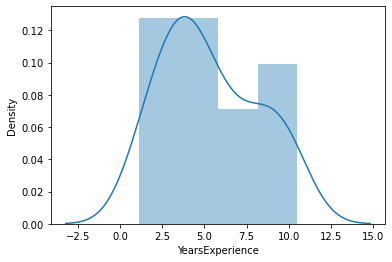

In [20]:
sns.distplot(salary['YearsExperience'])

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

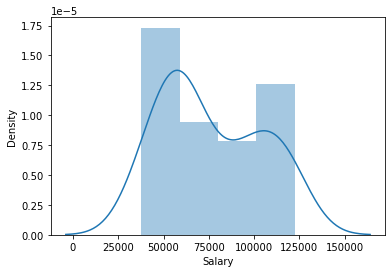

In [21]:
sns.distplot(salary['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

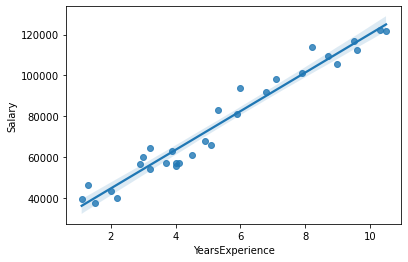

In [22]:
sns.regplot(x='YearsExperience',y='Salary',data=salary)

In [23]:
model=smf.ols('YearsExperience~Salary',data=salary).fit()

In [24]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [25]:
model.fittedvalues

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [26]:
salary['Predictions']=model.fittedvalues

In [27]:
salary

,YearsExperience,Salary,Predictions
0,1.1,39343.0,1.600934
1,1.3,46205.0,2.295819
2,1.5,37731.0,1.437694
3,2.0,43525.0,2.024427
4,2.2,39891.0,1.656428
5,2.9,56642.0,3.352729
6,3.0,60150.0,3.707969
7,3.2,54445.0,3.130248
8,3.2,64445.0,4.142905
9,3.7,57189.0,3.408121


In [28]:
model.pvalues

Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64

In [29]:
model.rsquared

0.9569566641435086